Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file

In [3]:
data = pd.read_csv('LoanApprovalPrediction.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing and Visualization

In [5]:
data.shape

(598, 13)

In [13]:
columns = list(data.columns)
print('Categorical Variables: ')
for column in columns:
  if data[column].dtypes == 'object':
    print(column)


Categorical Variables: 
Loan_ID
Gender
Married
Education
Self_Employed
Property_Area
Loan_Status


In [12]:
obj = (data.dtypes == 'object') #boolean result
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [14]:
# dropping Loan_id since its just a unique identifier and not correlated with any column
data.drop(['Loan_ID'],axis=1,inplace=True)

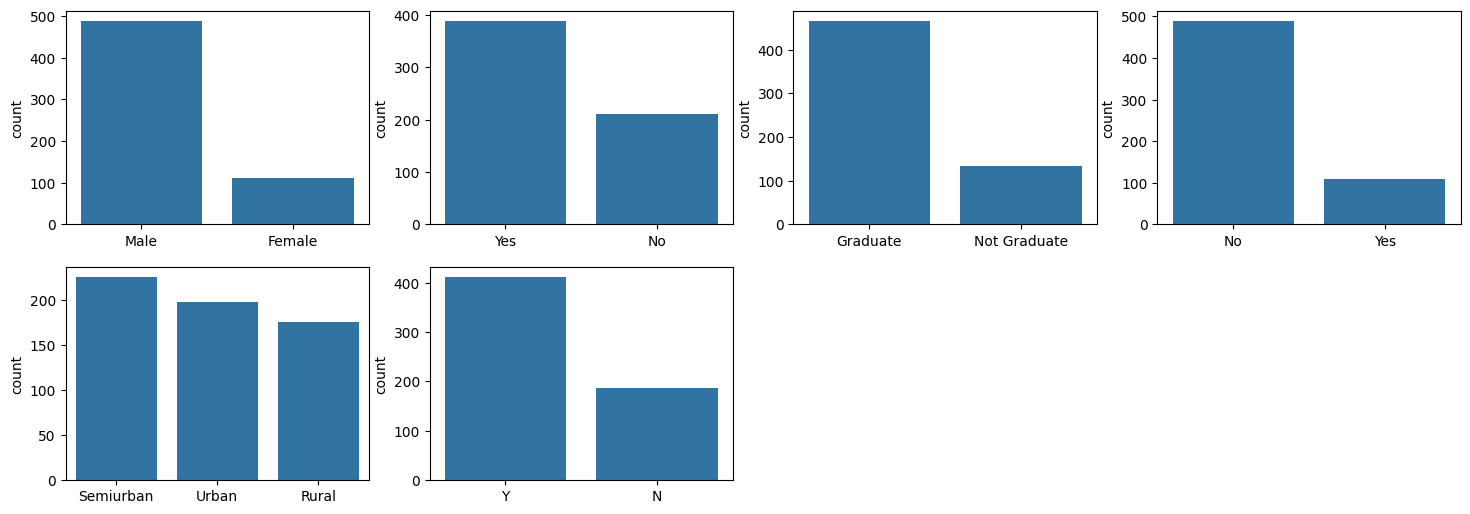

In [19]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)

plt.figure(figsize=(18,36))
index = 1
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)  # Creates a subplot grid of 11 rows × 4 columns.
  plt.xticks(rotation=360)
  sns.barplot(x = list(y.index),y = y)
  index += 1



Label Encoding

In [21]:
from sklearn import preprocessing
label_encoder  = preprocessing.LabelEncoder()

In [22]:
for col in object_cols:
  data[col] = label_encoder.fit_transform(data[col])

In [27]:
# To find the number of columns with
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

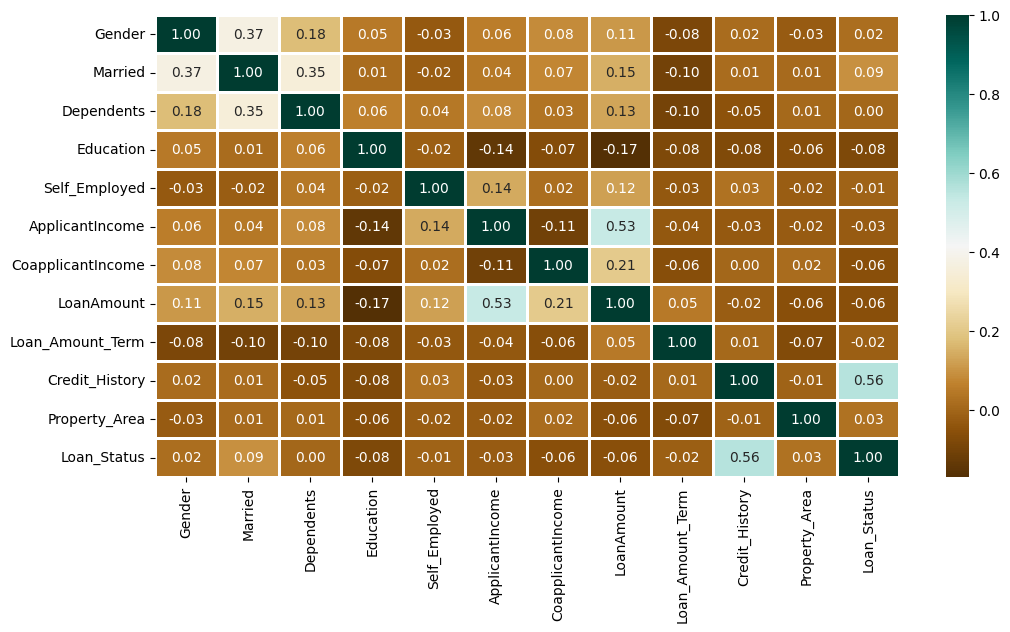

In [28]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

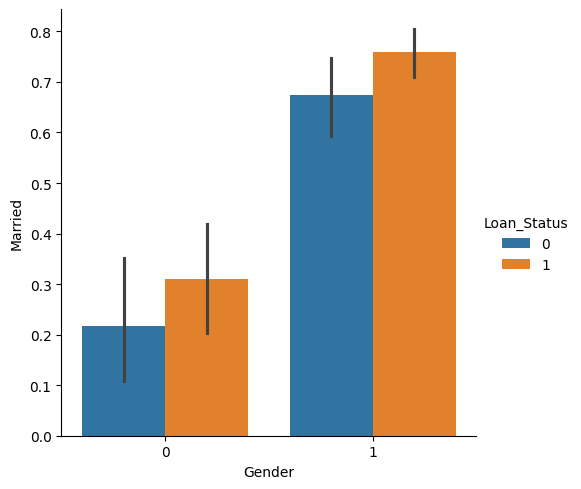

In [33]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)
# GENDER
# 1 -> MALE
# 0 -> FEMALE


# Married
# 0 -> no
# 1 -> yes

Handling Missing Values

In [35]:
data.isna().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [36]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

Splitting Dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']
X.shape, Y.shape


((598, 11), (598,))

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

Model Training and Evaluation

Try Classification Models:
1. KNeighborsClassifiers
2. RandomForestClassifiers
3. Support Vector Classifiers (SVC)
4. Logistics Regression

Choose model that gives better **accuracy**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# KNN
1. Creates a KNN model.

2. n_neighbors=3 means it looks at the 3 nearest data points (neighbors) to decide the class of a sample.

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)

# RANDOM FOREST
1. Creates a Random Forest model with:

2. n_estimators=7 → The forest will have 7 trees.

3. criterion='entropy' → Uses information gain to decide splits (alternative to gini).

4. random_state=7 → For reproducibility (same randomness each run).

In [45]:
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy',random_state = 7)


# SVM
1. Creates a Support Vector Machine classifier with default param

2. SVM tries to find the best decision boundary (hyperplane) separating the classes.

In [46]:
svc = SVC()

# LOGISTIC REGRESSION
1. Creates a Logistic Regression model

2. Uses a linear decision boundary.

In [47]:
lc = LogisticRegression()

Evaluation of metrics on training data

In [48]:
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print(f"Accuracy score of {clf.__class__.__name__} = { 100 * metrics.accuracy_score(Y_train, Y_pred)}")


Accuracy score of RandomForestClassifier = 98.04469273743017
Accuracy score of KNeighborsClassifier = 78.49162011173185
Accuracy score of SVC = 68.71508379888269
Accuracy score of LogisticRegression = 80.16759776536313


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"Accuracy score of { clf.__class__.__name__} = { 100*metrics.accuracy_score(Y_test,Y_pred)}")

Accuracy score of RandomForestClassifier = 82.5
Accuracy score of KNeighborsClassifier = 63.74999999999999
Accuracy score of SVC = 69.16666666666667
Accuracy score of LogisticRegression = 80.41666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
